#신경망.딥러닝
 신경망은 뇌의 신경네트워크에서 힌트를 얻어 만들어진 기계학습의 한 방법이며이 신경망을 깊게 쌓는 것을 딥러닝이라고 한다.

이 문서에서는 신경망의 구성요소인 뉴런모델과 2층 신경망 모델에 대해 다루게 될것이다

(2층 신경망 분석부터 오류 역전파까지)

- 뉴런 모델이란
> 신경망모델의 단위로 뇌세포인 뉴런의 동작방식에서 힌트를 얻은 모델로
뉴런모델이 신경세포에게서 신호를 처리하는 방식에서 많이 참고한 것이 보일것입니다.

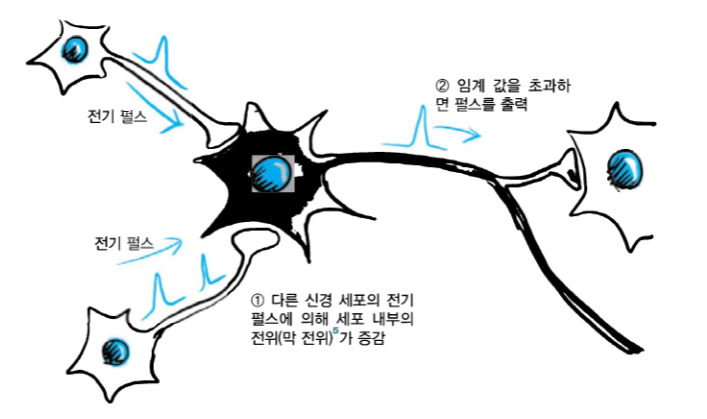(뉴런돌기 이미지(7-2))

뉴런은 축삭이라는 돌기를 가지고있는데 이 축삭을 이용하여 다른 뉴런에게 전달받은 전기적인 펄스를 또 다른 뉴런(다음 뉴런)에게 전달합니다.

이때 전기적인 펄스는 뉴런의 시냅스(전위를 올리거나 내리는)의 전달강도에 따라 달라집니다.

 *이것이 아마 입력받은 데이터(raw data나 feature가 이미 추출되며 나타난 feature data?)에 가중치를 곱하는 것으로 이어진게 아닌가 추측해본다.*


뉴런의 이러한 특징을 단순화하여 수학적으로 만든 가장 기초적인 모델인 뉴런모델은

[ x0 x1 1 ] (X) -*W-> [ w0x0 w1x1 w2 ] (A) -sigmoid-> [y] (Y)

라고도 표현할 수 있는데 입력값에 추가된 1은 더미데이터이다.(bios!)

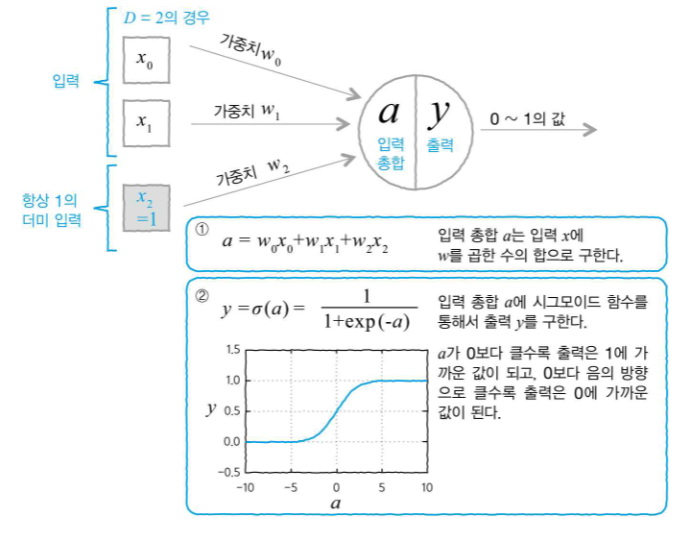
(그림 7-3)

위의 흐름에서 시그모이드 함수를 통과한다면 시그모이드의 y값 범위인 0~1사이의 값이 결정되며 입력된 a가 큰 수 일수록 값은 한계값인 1에 가까워지며 a가 작은 값일 수록 값은 0에 가까워 진다. 이 함수를 활성함수(activation function)이라고 한다. (0.5인 중심값을 기준으로 활성과 비활성을 구분해줄수있다.)

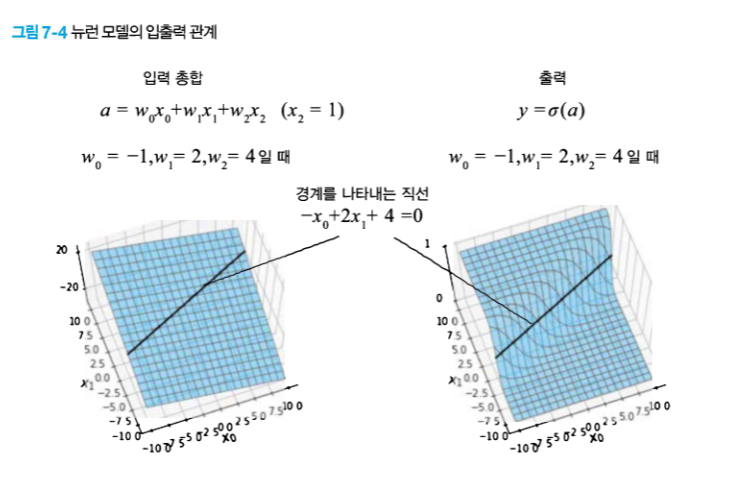
(그림 7-4)

위 그래프를 보면 알 수 있듯이 중심점(결정경계)을 기준으로 크게 두 갈래로 공간이 나뉘어진것을 알 수 있다.





## 2층 피드 포워드 신경망
위의 간단한 모델인 뉴런모델(퍼셉트론)을 이용하여 간단한 신경망인 2층 피드 포워드 신경망을 만들어 보자.

피드 포워드 신경망은 신호가 되돌아가지않고 한방향으로만 흐르는 신경망을 지칭한다.

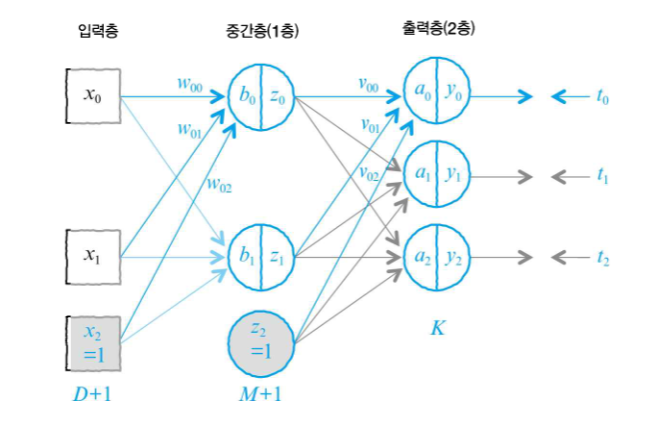
(그림 7-5)

우리는 중간층 하나와 출력층 하나로 2층 피드 포워드 신경망을 구성할 것이다.

*입력층까지해서 3층으로 보기도 하지만 본 교재(파이썬으로 머신러닝)와 문서에서는 비숍의 책을 모방하여 2층으로 부를 것이다.*


더해서 우리는 가중치인덱스를 w(나가는 쪽 번호)(들어온쪽 번호)로 분류해 지칭할 것이다.

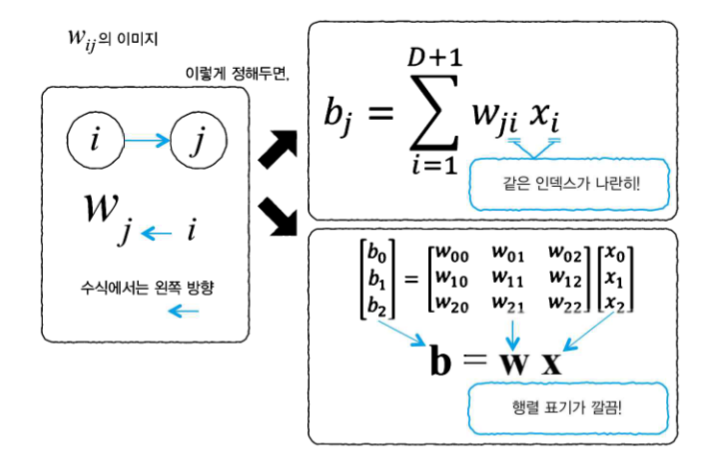
(그림 7-6)

그리고, 데이터 수는 N 입력차원은 D 중간층 뉴런의 수는 M 출력차원은 K로 지칭 할 것이다.
모델의 구조는 아래와 같다.

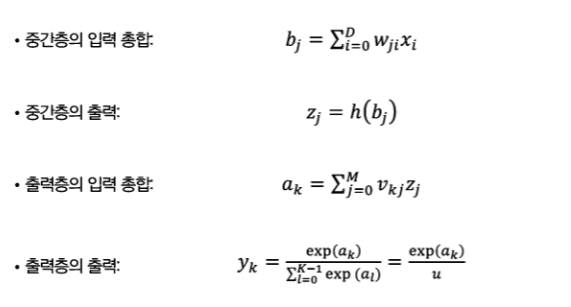

###데이터 생성 및 확인

In [2]:
import numpy as np

np.random.seed(seed=1)#난수고정
N = 200
K = 3
T = np.zeros((N,3), dtype= np.uint8)#출력
X = np.zeros((N,2)) #입력
#----------
X_range0 = [-3,3] #입력값 x0의 범위
X_range1 = [-3,3] #입력값 x1의 범위
Mu = np.array([[-.5,-.5],[.5,1.0],[1,-.5]]) #분포 중심
Sig = np.array([[.7,.7],[.8,.3],[.3,.8]]) #분포 분산
Pi = np.array([0.4,0.8,1])#각 분포의 비율
#===========
for n in range(N):
  wk = np.random.rand()
  for k in range(K):
    if wk < Pi[k]:
      T[n,k] = 1
      break
  for k in range(2):
    X[n,k] = np.random.randn() * Sig[T[n,:] == 1,k]+ Mu[T[n,:]==1,k]

In [3]:
#데이터 분할
TestRatio = 0.5
X_n_training = int(N*TestRatio)#절반
X_train = X[:X_n_training,:]
T_train = T[:X_n_training,:]
X_test = X[X_n_training:,:]
T_test = T[X_n_training:,:]


#데이터 저장
np.savez('class_data.npz', X_train = X_train, T_train = T_train,
         X_test = X_test, T_test = T_test,
         X_range0 =X_range0, X_range1 = X_range1)  # 입력값 x의 x0의 범위 x1의 범위 그런거인듯



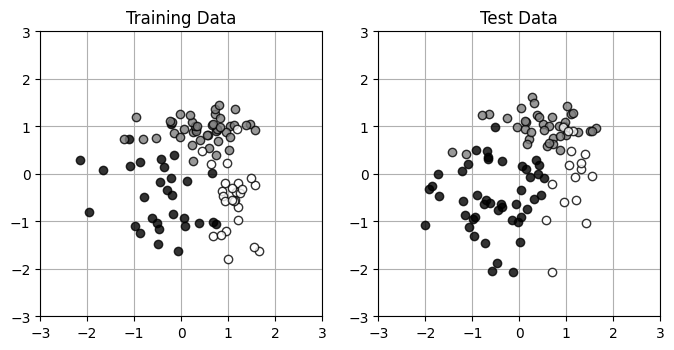

In [4]:
#데이터 확인(그래프 그리기--)
import matplotlib.pyplot as plt
%matplotlib inline

#========그리기
def Show_data(x,t):
  wk, n = t.shape
  c = [[0,0,0],[.5,.5,.5],[1,1,1]]#그래프 선 색

  for i in range(n):
    plt.plot(x[t[:,i] == 1,0], x[t[:,i]==1,1],
             linestyle='none',
             marker = 'o', markeredgecolor = 'black',
             color = c[i], alpha = 0.8)

    plt.grid(True)#격자


#========그래프
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1,2,1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')

plt.subplot(1,2,2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

###FNN(2층 피드 포워드 정의)


In [5]:
# == sigmoid
def Sigmoid(x):
  y = 1/ (1 + np.exp(-x))
  return y

# == FNN
def FNN(wv,M,K,x):#가중치,중간층 크기 ,출력층 크기, 입력
  N,D = x.shape
  #--가중치
  w = wv[:M * (D + 1)]#중간 층 가중치 w
  w = w.reshape(M, (D+1))#행렬로
  v = wv[M * (D + 1):]#출력 층 가중치 v
  v = v.reshape((K, M+1))#행렬로
  #--뉴런
  b = np.zeros((N, M+1)) #중간층 입력
  z = np.zeros((N, M+1)) #중간층 출력
  a = np.zeros((N, K)) #출력층 입력(sig(z))
  y = np.zeros((N, K)) #출력층 출력

  #===
  for n in range(N):#중간층
    for m in range(M):#중간층 계산
      b[n,m] = np.dot(w[m,:], np.r_[x[n,:], 1])# dot => 내적 , w와 입력값 내적
      z[n,m] = Sigmoid(b[n,m])#시그모이드
    z[n,M] = 1#bios

    wkz = 0
    for k in range(K):#출력층
      a[n, k] = np.dot(v[k,:],z[n,:])#가중치 v와 내적
      wkz = wkz + np.exp(a[n,k])#softmax를 위한
    for k in range(K):
      y[n, k]=np.exp(a[n,k])/wkz#softmax
  return y, a, z, b # 결과 , 출력층 내적,중간층 출력 , 중간층 내적,

WV = np.ones(15)
M = 2
K = 3
FNN(WV, M, K, X_train[:2,:])


(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

##수치해석법

FNN에 대한 평균 교차 엔트로피 함수

In [6]:
def CE_FNN(wv,M,K,x,t):
  N,D = x.shape
  y, a, z, b = FNN(wv, M, K, x)
  ce = - np.dot(np.log(y.reshape(-1)), t.reshape(-1))/N #평균 교차 엔트로피 결과 값을 이용하여 오차 계산
  return ce


#==test
WV = np.ones(15)
M =2
K=3
CE_FNN(WV,M,K,X_train[:2,:], T_train[:2,:])

1.0986122886681098

수치 미분법을 이용한 평균 교차엔트로피 오차 미분

[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


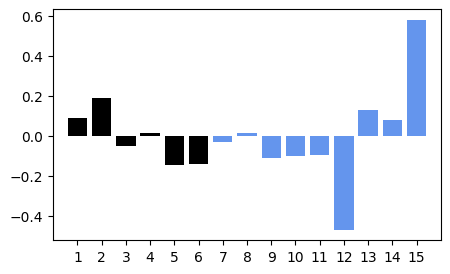

In [8]:
def dCE_FNN_num(wv, M, K, x, t):#아주 작은 값의 차이를 가진 수와 현재 값을 비교하여 미분을 구함
  epsilon = 0.001
  dwv = np.zeros_like(wv)
  for iwv in range(len(wv)):
    wv_modified = wv.copy()
    wv_modified[iwv] = wv[iwv] - epsilon
    mse1 = CE_FNN(wv_modified,M,K,x,t) #d/d(wv-ep)
    wv_modified[iwv] = wv[iwv] + epsilon
    mse2 = CE_FNN(wv_modified,M,K,x,t) #d/d(wv+ep)

    dwv[iwv]=(mse2 - mse1)/ (2*epsilon)
  return dwv



def Show_WV(wv, M):
  N = wv.shape[0]
  plt.bar(range(1,M*3+1), wv[:M*3], align="center", color = "black")
  plt.bar(range(M*3+1,N+1), wv[M*3:], align="center", color = "cornflowerblue")
  plt.xticks(range(1,N+1))
  plt.xlim(0,N+1)




#==test
M=2
K=3
nWV = M*3 + K*(M+1)
np.random.seed(1)
WV = np.random.normal(0,1,nWV)
dWV = dCE_FNN_num(WV, M,K,X_train[:2,:], T_train[:2,:])
print(dWV)
plt.figure(1,figsize = (5,3))
Show_WV(dWV,M)
plt.show()

수치 미분법을 이용한 경사하강법

In [9]:
import time

def FIt_FNN_num(wv_init, M, K, x_train,t_train, x_test, t_test, n, alpha):
  wvt = wv_init
  err_train = np.zeros(n)
  err_test = np.zeros(n)
  wv_hist = np.zeros((n,len(wv_init)))
  epsilon = 0.001
  for i in range(n):
    wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)
    err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
    err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
    wv_hist[i,:] = wvt

  return wvt, wv_hist, err_train, err_test


startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0,0.01,M*3+K*(M+1))
N_step = 1000
alpha = 0.5
WV, WV_hist, Err_train, Err_test = FIt_FNN_num(
    WV_init,M, K, X_train ,T_train, X_test,T_test, N_step, alpha
)
calculation_time = time.time() - startTime
print("Claculation time: {0:.3f} sec".format(calculation_time))

NameError: name 'timt' is not defined

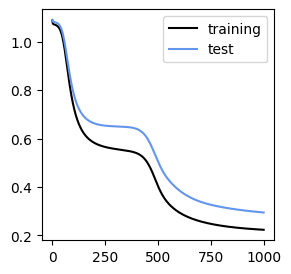

In [10]:
#학습 오차 표시
plt.figure(1, figsize = (3,3))
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label = 'test')
plt.legend()
plt.show()

train데이터에 대한 오차와 test에 대한 오차가 비슷하게 감소함을 알 수 있다.

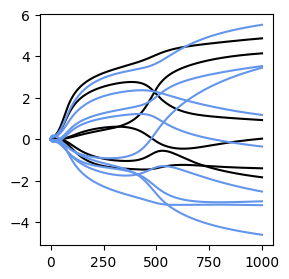

In [11]:
#가중치 시간 변화 표시(시간에 따른 가중치의 변화 표현)
plt.figure(1, figsize=(3,3))
plt.plot(WV_hist[:,:M*3],'black')
plt.plot(WV_hist[:,M*3:],'cornflowerblue')
plt.show()

가중치가 일정하게 증가하거나 감소하지 않고 꺾이는건 아마도 saddle point에 의한 기울기 증감 떄문이거나 지역 최소점에 의한 부분일 수 있다.

데이터 경계선 표시함수

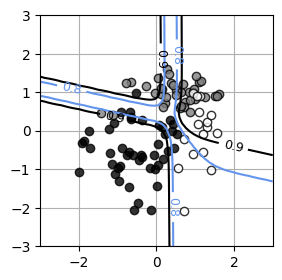

In [17]:
def show_FNN(wv, M, K):
  xn = 60 #해상도
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0,x1)
  x = np.c_[np.reshape(xx0, xn * xn), np.reshape(xx1, xn * xn)]
  y, a, z, b = FNN(wv, M, K, x)
  plt.figure(1, figsize = (4, 4))
  for ic in range(K):
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels=[0.8,0.9], colors = ['cornflowerblue','black'])
    cont.clabel(fmt = '%1.1f', fontsize=9)
  plt.xlim(X_range0)
  plt.ylim(X_range1)


#==그래프
plt.figure(1, figsize = (3, 3))
Show_data(X_test,T_test)
show_FNN(WV, M, K)
plt.show()

##오차 역전파법
결과에서부터 입력으로 하나하나 미분을 구해서 미분의 연쇄법칙을 이용하여 곱하여 전체의 미분값을 계산해 내는 것

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


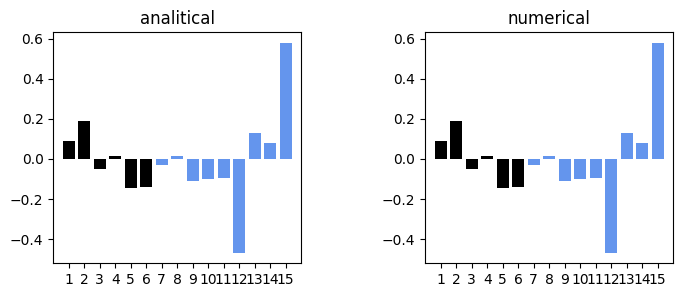

In [33]:
#해석적 미분
def dCE_FNN(wv, M, K, x, t):
  N,D = x.shape
  w = wv[:M*(D+1)]
  w = w.reshape(M,(D+1))
  v = wv[M*(D+1):]
  v = v.reshape((K,M+1))

  y, a, z, b = FNN(wv, M,K,x)
  dwv = np.zeros_like(wv)
  dw = np.zeros((M,D+1))
  dv = np.zeros((K, M+1))
  delta1 = np.zeros(M)
  delta2 = np.zeros(K)
  for n in range(N):
    for k in range(K):
      delta2[k] = (y[n,k]-t[n,k])
    for j in range(M):
      delta1[j] = z[n,j] * (1 - z[n,j])*np.dot(v[:,j],delta2)
    for k in range(K):
      dv[k, :]= dv[k,:]+ delta2[k] * z[n,:]/N
    for j in range(M):
      dw[j, :]=dw[j, :] + delta1[j] * np.r_[x[n,:],1]/N

  dwv = np.c_[dw.reshape((1, M*(D+1))),dv.reshape((1,K*(M+1)))]
  dwv = dwv.reshape(-1)
  return dwv


def Show_dWV(wv, M):
  N = wv.shape[0]
  plt.bar(range(1,M*3+1), wv[:M*3], align="center", color = "black")
  plt.bar(range(M*3+1,N+1), wv[M*3:], align="center", color = "cornflowerblue")
  plt.xticks(range(1,N+1))
  plt.xlim(0,N+1)


  #== 동작
M = 2
K = 3
N = 2
nWV = M*3+K*(M+1)
np.random.seed(1)
WV = np.random.normal(0,1,nWV)

dWV_ana = dCE_FNN(WV, M, K, X_train[:N,:], T_train[:N,:])
print("analytical dWV")
print(dWV_ana)

dWV_num = dCE_FNN_num(WV, M, K, X_train[:N,:], T_train[:N,:])
print("numerical dWV")
print(dWV_num)

plt.figure(1, figsize= (8,3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
Show_dWV(dWV_ana,M)
plt.title('analitical')
plt.subplot(1,2,2)
Show_dWV(dWV_num,M)
plt.title('numerical')
plt.show()

해석적 미분을 이용한 경사하강법

In [34]:
import time

def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
  wv = wv_init.copy()
  err_train = np.zeros(n)
  err_test = np.zeros(n)
  wv_hist = np.zeros((n, len(wv_init)))
  epsilon = 0.001
  for i in range(n):
    wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train)
    err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
    err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
    wv_hist[i, :] =wv

  return wv, wv_hist, err_train, err_test

startTIme = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0,0.01,M*3+K*(M+1))
N_step = 1000
alpha = 1
WV, WV_hist, Err_train, Err_test = Fit_FNN(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTIme
print("Calculation time: {0:.3f} sec".format(calculation_time))

Calculation time: 32.201 sec


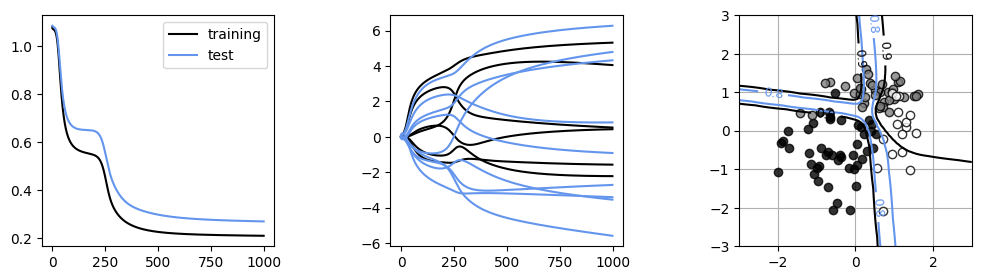

In [35]:
plt.figure(1, figsize = (12, 3))
plt. subplots_adjust(wspace = 0.5)
#학습오차
plt.subplot(1,3,1)
plt.plot(Err_train, 'black', label = 'training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()
#가중치 시간변화
plt.subplot(1,3,2)
plt.plot(WV_hist[:,:M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
#경계선
plt.subplot(1,3,3)
Show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

해석적 미분도 비슷한 결과를 확인할 수 있다.

학습 후 뉴런이 가지게 된 특징

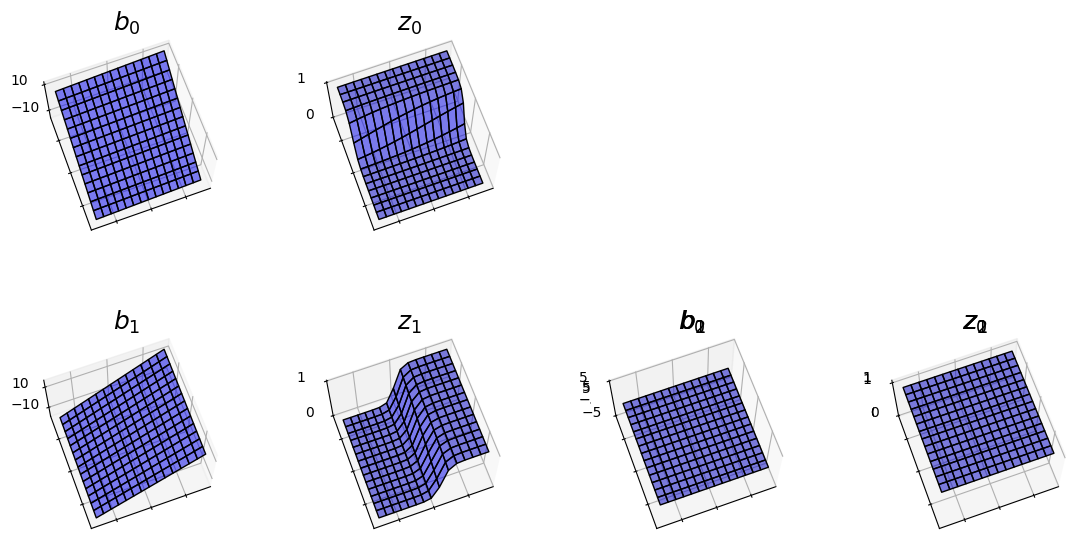

In [39]:
from mpl_toolkits.mplot3d import Axes3D

def show_activation3d(ax, v, v_ticks, title_str):
  f = v.copy()
  f = f.reshape(xn, xn)
  f = f.T
  ax.plot_surface(xx0,xx1,f, color='blue', edgecolor='black', rstride = 1, cstride = 1, alpha = 0.5)
  ax.view_init(70, -110)
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.set_zticks(v_ticks)
  ax.set_title(title_str, fontsize=18)


M = 2
K = 3
xn = 15
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn), np.reshape(xx1, xn  * xn)]
y, a, z, b = FNN(WV, M, K, x)


fig = plt.figure(1, figsize = (12,9))
plt.subplots_adjust(left=0.075, bottom = 0.05, right = 0.95, top = 0.95, wspace = 0.4, hspace = 0.4)

for m in range(M):
  ax = fig.add_subplot(3,4,1+m*4, projection = '3d')
  show_activation3d(ax, b[:,m], [-10,10], '$b_{0:d}$'.format(m))
  ax = fig.add_subplot(3,4,2+m*4, projection = '3d')
  show_activation3d(ax, z[:,m], [0,1], '$z_{0:d}$'.format(m))


for k in range(K):
  ax = fig.add_subplot(3,4,3+m*4, projection = '3d')
  show_activation3d(ax, b[:,k], [-5,5], '$b_{0:d}$'.format(k))
  ax = fig.add_subplot(3,4,4+m*4, projection = '3d')
  show_activation3d(ax, z[:,k], [0,1], '$z_{0:d}$'.format(k))


plt.show()

이 처럼 뉴런을 통과 한 후 활성함수에 의해 늘어나며공간이 분리되거나 이동하는등 바뀌는 것을 알 수 있다.

##Keras사용하기

메모리 초기화

In [64]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


라이브러리 import, data load

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1)
#keras
import keras.optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation

In [66]:
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

신경망 모델

In [68]:
np.random.seed(1)


model = Sequential()#모델 선언
model.add(Dense(2, input_dim = 2, activation = 'sigmoid', kernel_initializer = 'uniform'))#중간층
model.add(Dense(3, activation = 'softmax', kernel_initializer = 'uniform'))#출력층

sgd = keras.optimizers.SGD(learning_rate = 1, momentum = 0.0, nesterov = False)#SGD

model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])#CE, sgd사용 평가기준 덩확도


#==training
startTime = time.time()
history = model.fit(X_train, T_train, epochs = 1000, batch_size=100, verbose = 0, validation_data = (X_test, T_test))


#== 모델 평가
score = model . evaluate(X_test, T_test, verbose = 0)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'.format(score[0], score[1]))
calculation_time = time.time() - startTime
print("Calculation time : {0:.3f} sec".format(calculation_time))

cross entropy 0.29, accuracy 0.88
Calculation time : 33.579 sec


모델 평가

In [69]:
#데이터 그리기
def Show_data(x,t):
  wk, n = t.shape
  c = [[0,0,0],[.5,.5,.5],[1,1,1]]
  for i in range(n):
    plt.plot(x[t[:,i]==1,0],x[t[:,i]==1,1], linestyle = 'none', marker = 'o',
             color = c[i], alpha = 0.8)

  plt.grid(True)

loss 0.291713, acc 0.880000
113/113 [==============================] - 0s 1ms/step


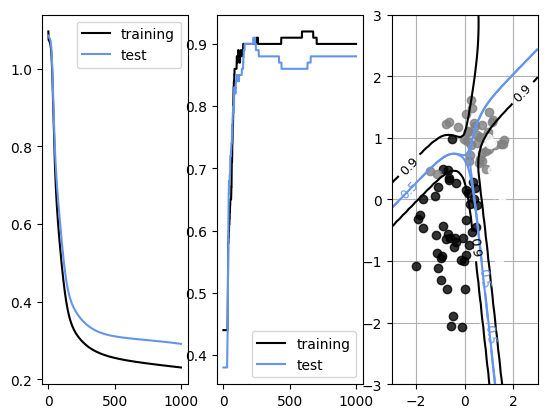

In [70]:
score = model.evaluate(X_test, T_test, verbose=0)
print('loss {0:f}, acc {1:f}'.format(score[0], score[1]))


#==graph
#학습곡선표시
plt.subplot(1,3,1)
plt.plot(history.history['loss'],'black', label='training')
plt.plot(history.history['val_loss'], 'cornflowerblue', label = 'test')
plt.legend()

#정확도 표시
plt.subplot(1,3,2)
plt.plot(history.history['accuracy'],'black', label='training')
plt.plot(history.history['val_accuracy'], 'cornflowerblue', label = 'test')
plt.legend()

#경계선 표시
plt.subplot(1,3,3)
Show_data(X_test,T_test)
xn = 60
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn), np.reshape(xx1, xn * xn)]
y = model.predict(x)
K = 3
for ic in range(K):
  f = y[:,ic]
  f = f.reshape(xn,xn)
  f = f.T
  cont = plt.contour(xx0, xx1, f, levels = [0.5,0.9], colors = ['cornflowerblue','black'])
  cont.clabel(fmt = '%1.1f', fontsize = 9)
  plt.xlim(X_range0)
  plt.ylim(X_range1)

plt.show()